In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("data.csv")
df = df.sample(n=5000, random_state=42).reset_index(drop=True)
df.head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.9100,1977,0.500000,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772000,4,0.0680,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805
1,0.5830,1976,0.930000,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115000,11,0.1280,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104
2,0.6470,1994,0.157000,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000000,7,0.1730,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744
3,0.1960,1957,0.937000,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837000,0,0.1120,-11.758,0,Soul Junction,13,1957,0.0363,186.764
4,0.4220,1921,0.995000,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846000,11,0.1120,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978
5,0.1190,2017,0.144000,['PARTYNEXTDOOR'],0.424,272340,0.4190,1,16aNJYinJv9AAetWD5yJen,0.000000,1,0.1740,-8.503,1,Freak in You,62,2017-06-02,0.0540,86.500
6,0.2650,1972,0.569000,['Big Star'],0.585,58907,0.3560,0,4s8oEXoqMtMLcM7JqsHVCW,0.000038,2,0.0848,-12.365,1,ST 100/6,23,1972,0.0352,88.758
7,0.0806,1951,0.977000,"['Giacomo Puccini', 'Giovanni Inghilleri', 'Re...",0.307,194573,0.0267,0,1LFJdyV9hCKHfCMO6Sp9wA,0.000000,5,0.1560,-24.962,1,Madama Butterfly / Act 2: Ora a noi. Sedete qui,0,1951-01-01,0.0802,76.894
8,0.6180,1966,0.718000,['Nancy Wilson'],0.634,130720,0.6840,0,6RsJIcoNvEyMKuXqnhJ71f,0.000714,4,0.1710,-5.713,0,My Babe,25,1966-01-01,0.0643,75.750
9,0.4030,1985,0.000147,['Big Black'],0.361,149000,0.8730,1,0XGcXc6VkB5dx6RNWxV0rF,0.261000,1,0.3080,-10.335,1,Big Money,25,1985-06-01,0.0429,177.327


In [6]:
# check the numerical features
print(df.describe())

           valence        year  ...  speechiness        tempo
count  5000.000000  5000.00000  ...  5000.000000  5000.000000
mean      0.523729  1976.44500  ...     0.103226   117.284548
std       0.262228    26.16379  ...     0.172551    30.664021
min       0.000000  1921.00000  ...     0.000000     0.000000
25%       0.316000  1955.00000  ...     0.035000    94.052750
50%       0.534000  1977.00000  ...     0.045300   115.580500
75%       0.739000  1999.00000  ...     0.076925   135.368750
max       0.981000  2020.00000  ...     0.967000   220.099000

[8 rows x 15 columns]


Using the unsupervised method (clustering)

In [7]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['valence', 'danceability', 'energy', 'tempo', 'acousticness', 'liveness', 'speechiness', 'instrumentalness']

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

df_scaled

,valence,danceability,energy,tempo,acousticness,liveness,speechiness,instrumentalness
0,1.473178,2.032267,0.142150,0.310507,-0.005840,-0.783298,-0.107375,1.916073
1,0.226049,0.276101,-0.771789,-0.886487,1.126217,-0.446557,-0.133457,-0.171477
2,0.470135,1.941333,0.138480,-0.865614,-0.908852,-0.194001,1.737477,-0.536877
3,-1.249911,-0.417272,-0.716732,2.266056,1.144646,-0.536354,-0.387900,2.122604
4,-0.387981,0.634154,-1.404939,-1.477663,1.297342,-0.536354,0.010283,2.151200
...,...,...,...,...,...,...,...,...
4995,0.336651,-0.019435,0.810170,0.374302,-0.837769,-0.598090,-0.353124,-0.536877
4996,1.507503,1.009258,1.357065,-0.824128,-1.106567,0.434583,-0.270821,-0.536877
4997,-0.681647,-1.826752,-0.599278,-2.003804,0.999848,0.114678,-0.387900,-0.536835
4998,-0.906665,-0.815109,-1.495966,-0.516212,1.284178,-0.592478,-0.412243,-0.287769


In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_scaled, test_size=0.2, random_state=42)

# Elbow Method Plot
to find optimal K

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Elbow Method for Optimal K')

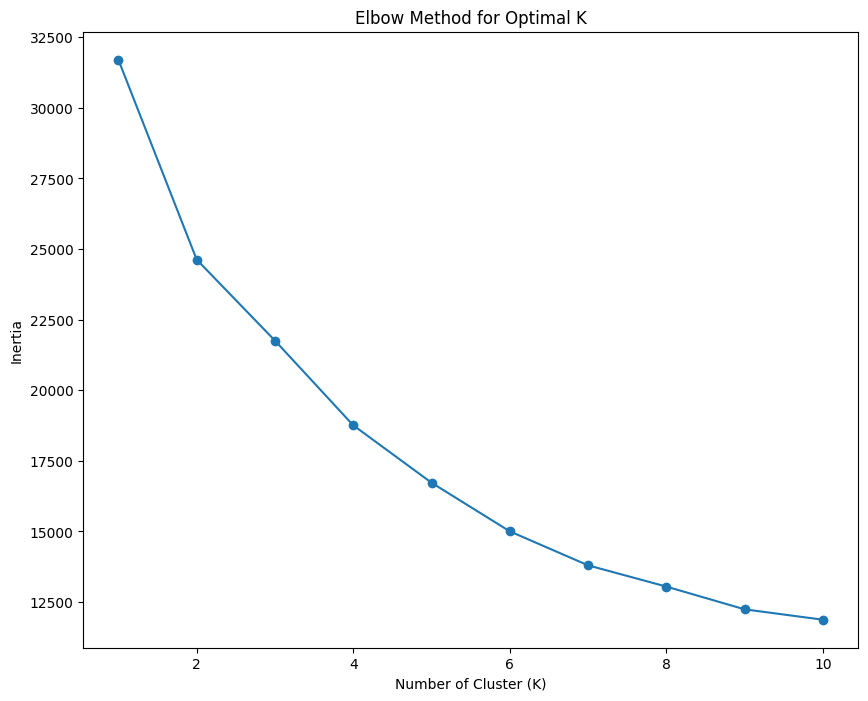

In [9]:
%pip install matplotlib

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 11)


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('Inertia')
plt.title("Elbow Method for Optimal K")

Applying kmeans

In [10]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

In [13]:
df['Cluster'].value_counts().sort_index()

Cluster
0    1369
1    1371
2     948
3     208
4    1104
Name: count, dtype: int64

In [14]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Cluster
0,0.910,1977,0.5000,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772000,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805,1
1,0.583,1976,0.9300,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115000,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104,0
2,0.647,1994,0.1570,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744,1
3,0.196,1957,0.9370,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837000,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764,2
4,0.422,1921,0.9950,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846000,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.612,2001,0.1840,['Alice Cooper'],0.533,186093,0.7030,0,5LY8GsHfU7G6tmeXxStEb6,0.000000,2,0.101,-6.364,1,No More Mr. Nice Guy - 2002 Remaster,42,2001,0.0423,128.761,1
4996,0.919,1999,0.0819,['Britney Spears'],0.714,200467,0.8520,0,6039GmVngyHmWfOuWOhjCK,0.000000,8,0.285,-6.570,1,Soda Pop,40,1999-01-12,0.0565,92.016,1
4997,0.345,2012,0.8820,['Issa Ibrahim'],0.215,167741,0.3190,0,4UuMkQLjxSgcrW2d1zFIJT,0.000013,0,0.228,-12.845,1,Susan,0,2012-09-03,0.0363,55.846,2
4998,0.286,1942,0.9900,"['Felix Mendelssohn', 'Paul Robeson Jr.', 'Law...",0.393,187267,0.0747,0,2rRxJzTQyvm5Wwj9ObnZvv,0.078400,10,0.102,-17.930,1,"The Lord God of Abraham, from Elijah, Op. 70",0,1942,0.0321,101.457,2


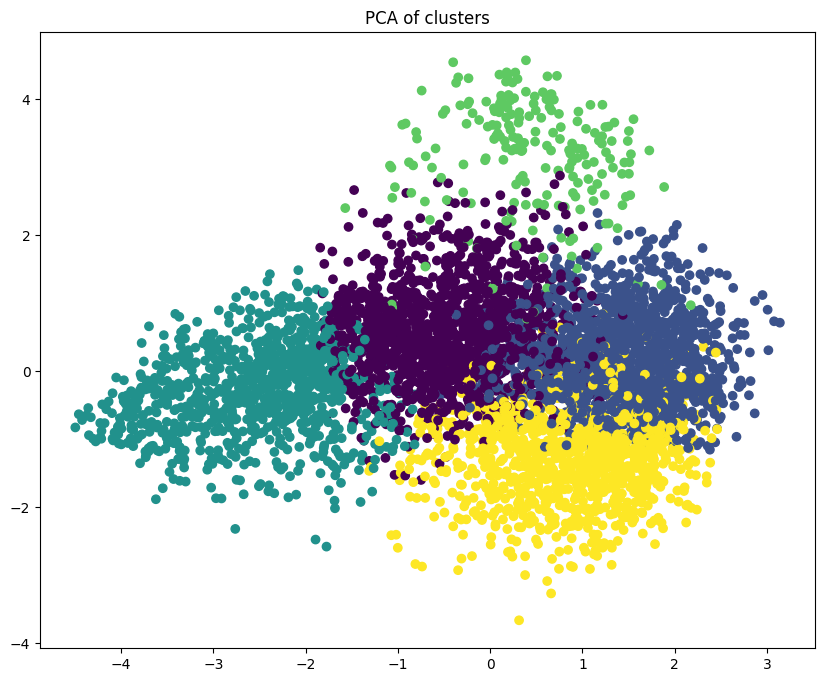

In [16]:
# decomposing the clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # dimension reduction to 2D for visualization

pca_result = pca.fit_transform(df_scaled)
pca_result
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:,1], c=df['Cluster'], cmap='viridis')
plt.title('PCA of clusters')
plt.show()

# Recommendation System with Kmeans

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_songs(song_name, df, num_recommendations=5):
    # get cluster of the input song
    song_cluster = df[df['name'] == song_name]['Cluster'].values[0]
    # filter songs in the same cluster
    same_cluster_songs = df[df['Cluster']==song_cluster]
    
    # calculate cosine similarity
    song_index = same_cluster_songs[same_cluster_songs["name"]==song_name].index[0]
    cluster_features = same_cluster_songs[numerical_features]
    similarity = cosine_similarity(cluster_features, cluster_features)
    
    # get the top recommendations
    similar_songs = np.argsort(similarity[song_index])[-(num_recommendations + 1):-1][::-1]
    recommendations = same_cluster_songs.iloc[similar_songs][["name", "year", "artists"]]
    
    
    return recommendations

In [31]:
input_song = "Recognize"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
recommended_songs

Songs similar to 'Recognize':


,name,year,artists
3933,Later,1954,['Ella Fitzgerald']
3781,There You Go,1958,['Johnny Cash']
161,Forró Em Caruarú,1954,['Jackson Do Pandeiro']
32,"Cao, Cao, Maní Picao",1959,"['La Sonora Matancera', 'Celia Cruz']"
2914,Acuarelas de Tamboritos,1935,"['Sylvia de Grasse', 'Avelino Muñoz']"


In [32]:
df.to_csv("clustered_df.csv")